In [2]:
# Import required packages
import pandas as pd
import SPARQLWrapper

from SPARQLWrapper import SPARQLWrapper, JSON

# Set up the endpoint
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Define the query
query = """

SELECT ?diseaseLabel (COUNT(?statement) AS ?count) (GROUP_CONCAT(?symptomLabel; separator="|") AS ?symptoms)
WHERE {
  ?disease wdt:P31 wd:Q12136.
  ?disease ?p ?statement.
  OPTIONAL {
    ?disease wdt:P780 ?symptom.
    ?symptom rdfs:label ?symptomLabel filter (lang(?symptomLabel) = "en").
  }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?diseaseLabel
ORDER BY DESC(?count)
LIMIT 100000

"""

# Set the query and response format
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

# Execute the query and parse the results
results = sparql.query().convert()
disease_df = pd.DataFrame(columns=["Disease", "Count", "Symptoms"])
for result in results["results"]["bindings"]:
    disease = result["diseaseLabel"]["value"]
    count = int(result["count"]["value"])
    symptoms = result["symptoms"]["value"].split("|") if "symptoms" in result else []
    disease_df = disease_df.append({"Disease": disease, "Count": count, "Symptoms": symptoms}, ignore_index=True)

# Print the dataframe
disease_df

/var/folders/km/c2nvzhwn31b2ldhz5749sq0w0000gn/T/ipykernel_27382/3261339531.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disease_df = disease_df.append({"Disease": disease, "Count": count, "Symptoms": symptoms}, ignore_index=True)
/var/folders/km/c2nvzhwn31b2ldhz5749sq0w0000gn/T/ipykernel_27382/3261339531.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disease_df = disease_df.append({"Disease": disease, "Count": count, "Symptoms": symptoms}, ignore_index=True)
/var/folders/km/c2nvzhwn31b2ldhz5749sq0w0000gn/T/ipykernel_27382/3261339531.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disease_df = disease_df.append({"Disease": disease, "Count": count, "Symptoms": symptoms}, ignore_index=True)
/var/folders/km/

,Disease,Count,Symptoms
0,mercury poisoning,11526,"[headache, headache, headache, headache, heada..."
1,rabies,10336,"[headache, headache, headache, headache, heada..."
2,Lyme disease,7596,"[headache, headache, headache, headache, heada..."
3,Crimean-Congo hemorrhagic fever,7200,"[headache, headache, headache, headache, heada..."
4,decompression sickness,6739,"[headache, headache, headache, headache, heada..."
...,...,...,...
5709,Q23717357,8,[]
5710,Q25694642,8,[]
5711,Q25694644,8,[]
5712,isthmic spondylolisthesis,8,[]


In [3]:
# Flatten the list of symptoms
symptoms = disease_df['Symptoms'].explode()

# Count the occurrences of each symptom
symptom_counts = symptoms.value_counts()

# Create a new dataframe with the most frequent symptoms
top_symptoms = pd.DataFrame({'Symptom': symptom_counts.index, 'Count': symptom_counts.values})

# Print the result
top_symptoms

,Symptom,Count
0,headache,5793
1,,5481
2,vomiting,4127
3,fever,3549
4,nausea,3494
...,...,...
381,cyst,21
382,polydipsia,20
383,toothache,19
384,fecal vomiting,16


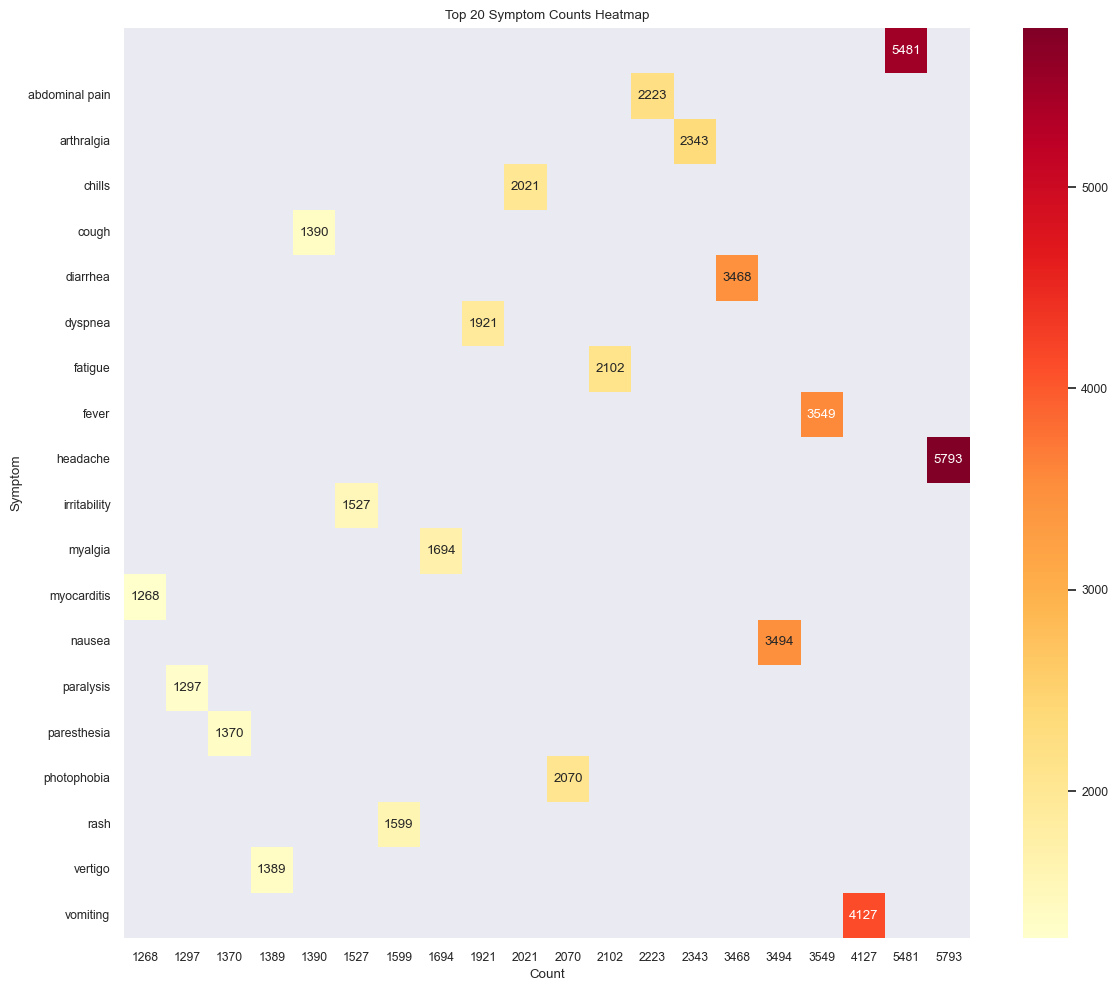

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top N symptoms by count
N = 20
top_symptoms = top_symptoms[:N]

df = pd.DataFrame(top_symptoms)

# Create a heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 10))
sns.heatmap(df.pivot(index='Symptom', columns='Count', values='Count'), cmap='YlOrRd', annot=True, fmt='g')
plt.title(f'Top {N} Symptom Counts Heatmap')
plt.tight_layout()
plt.show()